In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [248]:
df=pd.read_csv(r"D:\Users\abhisv\Desktop\Historical Product Demand.csv")

In [249]:
df.shape

(1048575, 5)

In [250]:
df=df.sample(10000)

In [251]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1015060 to 233547
Data columns (total 5 columns):
Product_Code        10000 non-null object
Warehouse           10000 non-null object
Product_Category    10000 non-null object
Date                9891 non-null object
Order_Demand        10000 non-null object
dtypes: object(5)
memory usage: 468.8+ KB


In [253]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1015060,Product_1392,Whse_J,Category_019,2016/2/18,100
275284,Product_0453,Whse_S,Category_015,2013/8/27,1
984800,Product_0982,Whse_A,Category_028,2016/3/23,100
574062,Product_1490,Whse_J,Category_019,2014/9/3,200
303514,Product_1287,Whse_J,Category_019,2013/4/16,700


In [254]:
df.isna().sum()

Product_Code          0
Warehouse             0
Product_Category      0
Date                109
Order_Demand          0
dtype: int64

In [255]:
df.reset_index(inplace=True,drop=True)

In [256]:
df.head(2)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_1392,Whse_J,Category_019,2016/2/18,100
1,Product_0453,Whse_S,Category_015,2013/8/27,1


In [257]:
df.dropna(axis=0,how='any',inplace=True)

In [258]:
df['Date']=df['Date'].apply(pd.to_datetime)
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [259]:
df.head(2)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,Day
0,Product_1392,Whse_J,Category_019,2016-02-18,100,2016,2,18
1,Product_0453,Whse_S,Category_015,2013-08-27,1,2013,8,27


In [260]:
df.drop(['Date','Product_Code'],axis=1,inplace=True)

In [261]:
df.drop(['Product_Category'],axis=1,inplace=True)

In [262]:
df.isna().sum()

Warehouse       0
Order_Demand    0
year            0
month           0
Day             0
dtype: int64

In [265]:
#one hot encoding for warehouse
warehouse_dummy=pd.get_dummies(df['Warehouse'],drop_first=True)

In [266]:
df=pd.concat([df,warehouse_dummy],axis=1)

In [267]:
df.drop('Warehouse',axis=1,inplace=True)

In [268]:
df.head(3)

,Order_Demand,year,month,Day,Whse_C,Whse_J,Whse_S
0,100,2016,2,18,0,1,0
1,1,2013,8,27,0,0,1
2,100,2016,3,23,0,0,0


In [278]:
df['Order_Demand']=df['Order_Demand'].map(lambda x: x.rstrip('\n'))
df['Order_Demand']=df['Order_Demand'].map(lambda x: x.lstrip('\n'))

In [285]:
df.dtypes

Order_Demand    object
year             int64
month            int64
Day              int64
Whse_C           uint8
Whse_J           uint8
Whse_S           uint8
dtype: object

In [287]:
df['Order_Demand']=df['Order_Demand'].astype('int')

In [319]:
df_1=df[['Order_Demand','year','month','Day']]

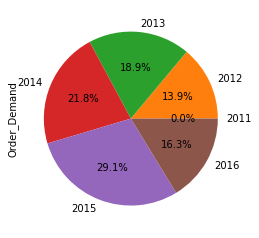

In [322]:
data1=df_1.groupby('year')['Order_Demand'].sum()
data1.plot.pie(autopct='%.1f%%')

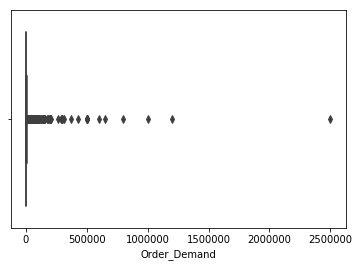

In [338]:
####Lets check the outliers
sns.boxplot(df['Order_Demand'])

In [339]:
df.describe().columns

Index(['Order_Demand', 'year', 'month', 'Day', 'Whse_C', 'Whse_J', 'Whse_S'], dtype='object')

In [371]:
df_od=df.iloc[:,0]

In [373]:
df_od=pd.DataFrame(df_od)

In [380]:
def outliertreatment(df_od):
    for i in df_od:
        Q1=np.quantile(df_od,0.25)
        Q3=np.quantile(df_od,0.75)
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        x=np.array(df_od[i])
        p=[]
        for j in x:
            if j<LTV or j>UTV:
                p.append(df_od[i].median())
            else:
                p.append(j)
        df_od[i]=p
    

In [381]:
outliertreatment(df_od)

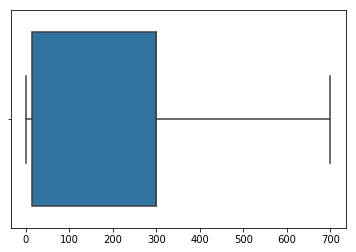

In [382]:
sns.boxplot(df_od)

In [383]:
df.head(2)

,Order_Demand,year,month,Day,Whse_C,Whse_J,Whse_S
0,100,2016,2,18,0,1,0
1,1,2013,8,27,0,0,1


In [384]:
df_od.head(2)

,Order_Demand
0,100.0
1,1.0


In [389]:
df.drop('Order_Demand',axis=1,inplace=True)

In [392]:
df=pd.concat([df,df_od],axis=1)

In [394]:
df.head(2)

,year,month,Day,Whse_C,Whse_J,Whse_S,Order_Demand
0,2016,2,18,0,1,0,100.0
1,2013,8,27,0,0,1,1.0


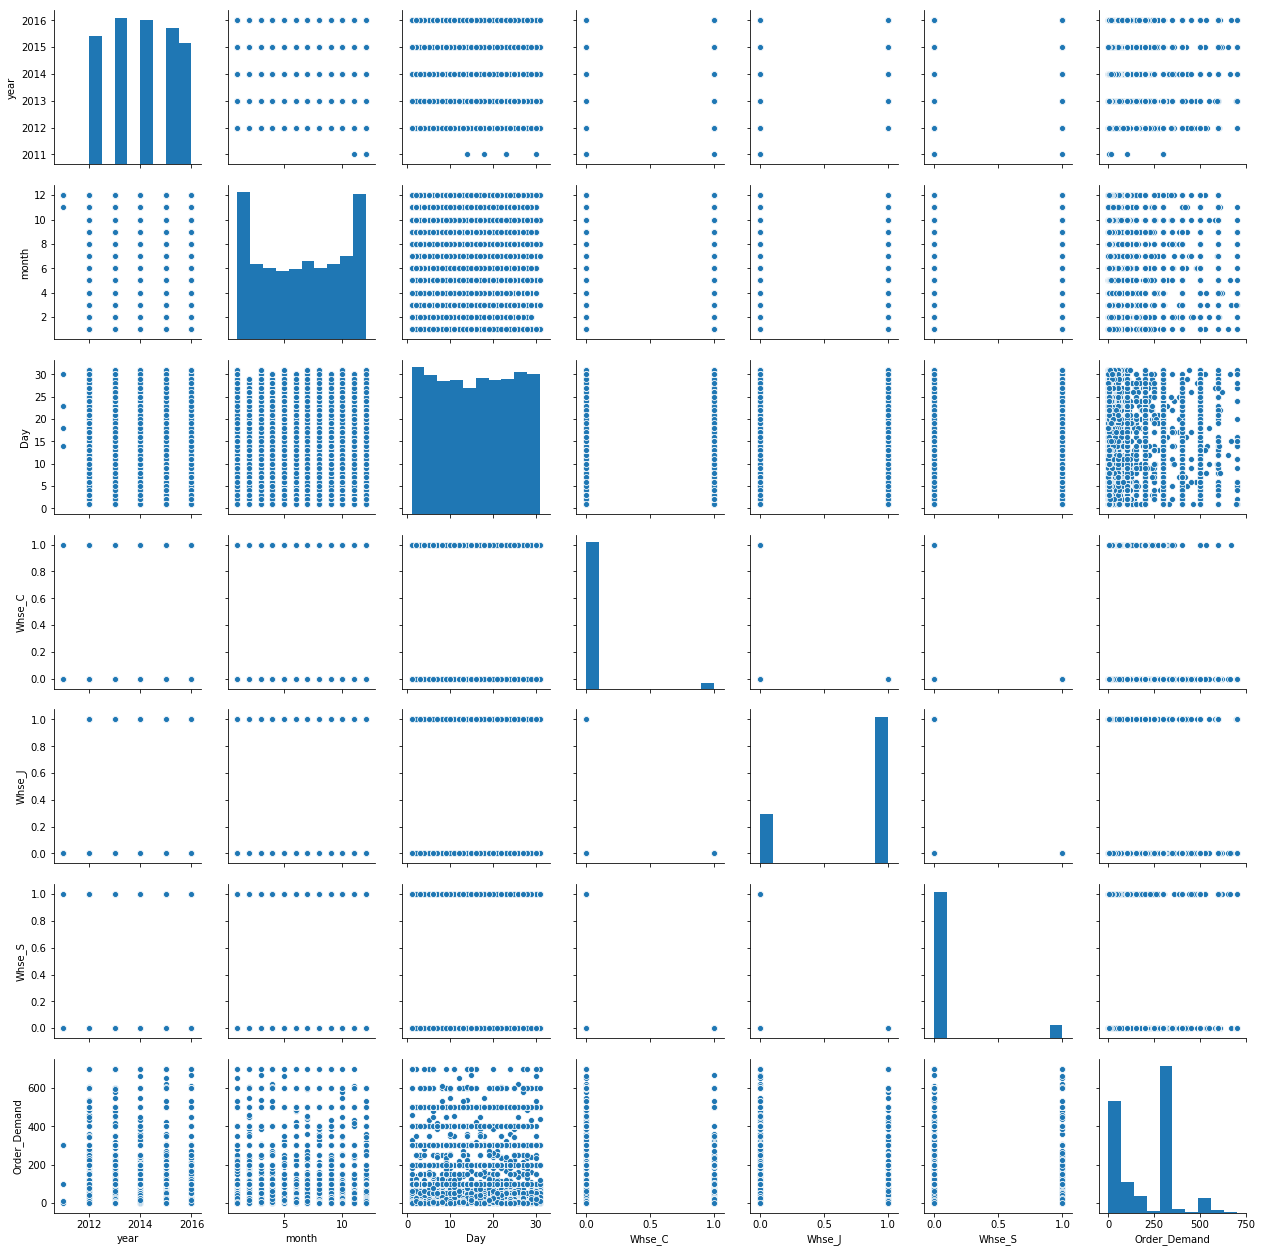

In [395]:
sns.pairplot(df)

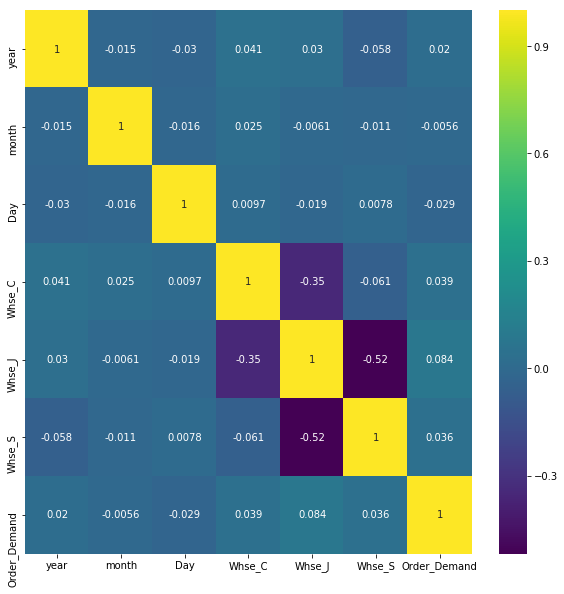

In [405]:
plt.figure(figsize=(10,10))
corr_mat=df.corr(method='spearman')
sns.heatmap(corr_mat,annot=True,cmap='viridis')

In [409]:
#corr with output variable
corr_target=abs(corr_mat['Order_Demand'])
#relevent features wrt to target
relevent_features=corr_target[corr_target>0.3]
relevent_features

Order_Demand    1.0
Name: Order_Demand, dtype: float64

In [413]:
y=df.iloc[:,-1]
x=df.iloc[:,0:6]

In [414]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [444]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [445]:
x_train.shape,y_train.shape

((6923, 6), (6923,))

In [506]:
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [507]:
y_pred=dtr.predict(x_train)

In [508]:
y_pred.shape

(6923,)

In [509]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

In [510]:
def model_validation(x):
    if x=='train':
        validation_table_train=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(x_train,y_train)
            rd.predict(x_train)
            mae=mean_absolute_error(y_train,rd.predict(x_train))
            mse=mean_squared_error(y_train,rd.predict(x_train))
            mape=(((abs(y_train-rd.predict(x_train))/y_train)*100).sum())*(1/y_train.shape[0])
            rmse=np.sqrt(mean_squared_error(y_train,rd.predict(x_train)))
            r_square=r2_score(y_train,rd.predict(x_train))
            validation_table_train.append([i,mae,mse,mape,rmse,r_square])
        validation_table_train=pd.DataFrame(validation_table_train)
        validation_table_train.columns=['modelname','mae','mse','mape','rmse','r_square']
        return validation_table_train
    else:
        validation_table_test=[]
        models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
        for i in models:
            rd=i()
            rd.fit(x_train,y_train)
            rd.predict(x_test)
            mae=mean_absolute_error(y_train,rd.predict(x_train))
            mse=mean_squared_error(y_train,rd.predict(x_train))
            mape=(((abs(y_train-rd.predict(x_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rmse=np.sqrt(mean_squared_error(y_train,rd.predict(x_train)))
            r_square=r2_score(y_train,rd.predict(x_train))
            validation_table_test.append([i,mae,mse,mape,rmse,r_square])
        validation_table_test=pd.DataFrame(validation_table_test)
        validation_table_test.columns=['modelname','mae','mse','mape','rmse','r_square']
        return validation_table_test

In [511]:
model_validation('train')

D:\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,modelname,mae,mse,mape,rmse,r_square
0,<class 'sklearn.linear_model.base.LinearRegres...,137.638047,23580.929587,inf,153.560834,0.015675
1,<class 'sklearn.linear_model.coordinate_descen...,138.854807,23690.062825,inf,153.915765,0.011119
2,<class 'sklearn.linear_model.ridge.Ridge'>,137.647782,23580.938403,inf,153.560862,0.015674
3,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,91.827275,14797.713490,inf,121.645853,0.382307
4,<class 'sklearn.ensemble.forest.RandomForestRe...,101.791884,16139.597258,inf,127.041715,0.326294
5,<class 'sklearn.ensemble.bagging.BaggingRegres...,101.707904,16140.570652,inf,127.045546,0.326253


In [512]:
model_validation('test')

D:\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,modelname,mae,mse,mape,rmse,r_square
0,<class 'sklearn.linear_model.base.LinearRegres...,137.638047,23580.929587,inf,153.560834,0.015675
1,<class 'sklearn.linear_model.coordinate_descen...,138.854807,23690.062825,inf,153.915765,0.011119
2,<class 'sklearn.linear_model.ridge.Ridge'>,137.647782,23580.938403,inf,153.560862,0.015674
3,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,91.827275,14797.713490,inf,121.645853,0.382307
4,<class 'sklearn.ensemble.forest.RandomForestRe...,101.585773,16123.351518,inf,126.977760,0.326972
5,<class 'sklearn.ensemble.bagging.BaggingRegres...,102.058494,16182.396231,inf,127.210048,0.324507


In [485]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score  
print(cross_val_score(dtr,x_train,y_train,cv=5,scoring='neg_mean_squared_error'))

[-34691.06933066 -36369.89571823 -35508.42690191 -36113.69992981
 -37531.40729478]


In [486]:
##So Decision tree gives better performance

In [515]:
dtr.predict([[2017,1,1,0,1,0]])

array([198.28807947])

In [502]:
features=list(x.columns[0:])

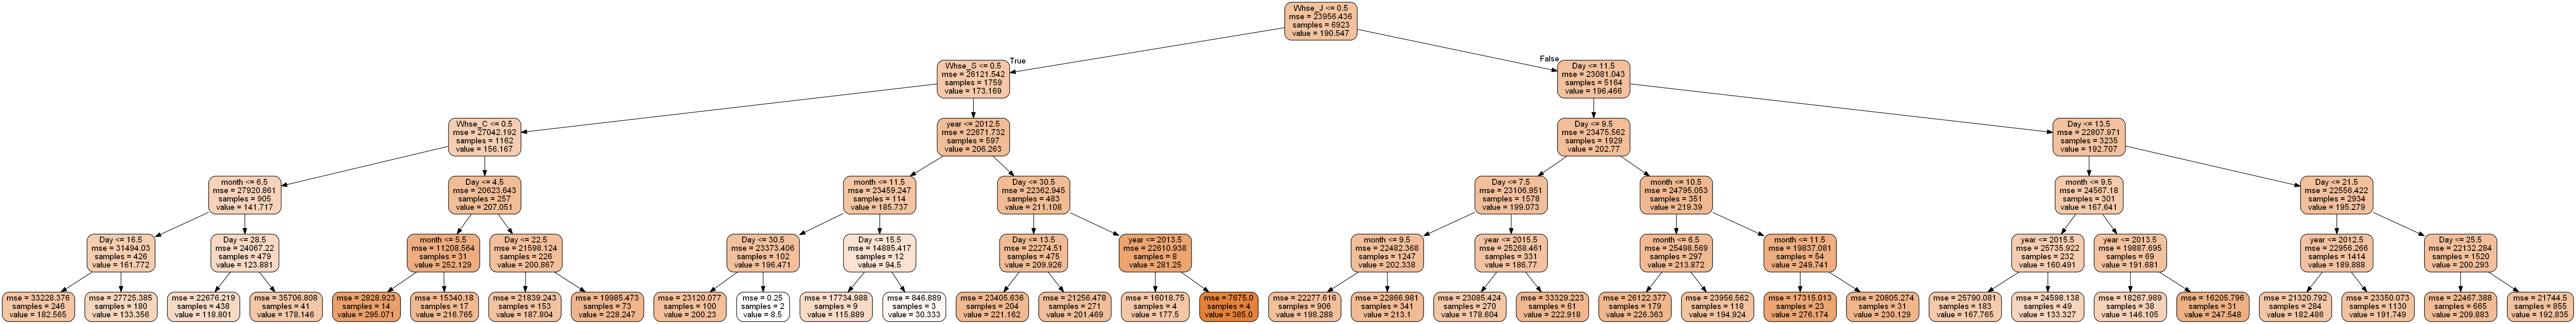

In [513]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


dot_data = StringIO()  
export_graphviz(dtr, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())